In [1]:
import numpy as np
from scipy.integrate import simps, trapz
import matplotlib.pyplot as plt

$$
\begin{align}
G(i\omega_n) = \int_{-\infty}^{\infty} \frac{d \omega'}{2\pi} \frac{A(\omega')}{i\omega_n-\omega'}\\
G(\tau) = \frac{1}{\beta} \sum_n e^{-i\omega_n\tau}G(i\omega_n)
\end{align}
$$

In [2]:
def G(x):
    N = len(omega)
    return np.array([simps(x/(1j*omega[i]-w.real), w.real) for i in range (N)])

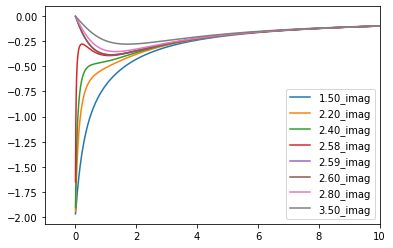

In [26]:
directory1 = './1_dmftsolver/NRG'
directory2 = '1to4'
D = 1.
T = 0.001
N = 5000
beta = int(1./T)
if T == 0.001: 
    add_dir = '_0.001'
    if directory2=='1to4': UU = np.array([1.50, 2.20, 2.40, 2.58, 2.59, 2.60, 2.80, 3.50])
    elif directory2=='4to1': UU = np.array([1.50, 2.00, 2.19, 2.20, 2.21, 2.40, 2.70, 3.50])
elif T == 0.01:
    add_dir = '_0.01'
    if directory2=='1to4': UU = np.array([1.50, 2.00, 2.20, 2.36, 2.37, 2.40, 2.70, 3.50])
    elif directory2=='4to1': UU = np.array([1.50, 2.00, 2.19, 2.20, 2.21, 2.40, 2.70, 3.50])


U = np.array([0.01*i for i in range(100, 401)])
w_len = len(np.loadtxt(f'.{directory1}/{directory2}{add_dir}/Bethe-{2.00:.2f}_solution.dat', \
                       unpack = True, dtype = 'complex128')[0])

x = np.zeros((len(U), w_len), dtype = 'float64')
omega = np.pi/beta * (2*np.arange(N)+1) # w_n
G_omega = np.zeros((len(x), len(omega)), dtype = 'complex128')

for i, u in enumerate(U):
    w, A_w, G_w, S_w = np.loadtxt(f'.{directory1}/{directory2}{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega[i] = G(x[i])
    np.savetxt(f'.{directory1}/{directory2}{add_dir}/Giw-{u:.2f}.dat', \
               np.array([omega.real, G_omega[i].real, G_omega[i].imag]).T)
for i, u in enumerate(UU):
    w, Giw_real, Giw_imag = np.loadtxt(f'.{directory1}/{directory2}{add_dir}/Giw-{u:.2f}.dat', \
                                       unpack = True, dtype = 'float64')
    plt.plot(omega, Giw_imag, label = f'{u:.2f}_imag')
plt.xlim(-1, 10)
plt.legend()

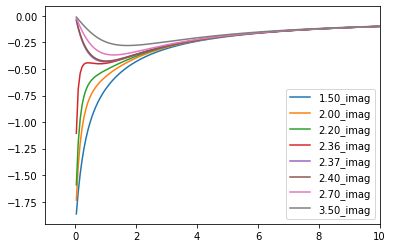

In [25]:
directory1 = './1_dmftsolver/NRG'
directory2 = '1to4'
D = 1.
T = 0.01
N = 5000
beta = int(1./T)
if T == 0.001: 
    add_dir = '_0.001'
    if directory2=='1to4': UU = np.array([1.50, 2.20, 2.40, 2.58, 2.59, 2.60, 2.80, 3.50])
    elif directory2=='4to1': UU = np.array([1.50, 2.00, 2.19, 2.20, 2.21, 2.40, 2.70, 3.50])
elif T == 0.01:
    add_dir = '_0.01'
    if directory2=='1to4': UU = np.array([1.50, 2.00, 2.20, 2.36, 2.37, 2.40, 2.70, 3.50])
    elif directory2=='4to1': UU = np.array([1.50, 2.00, 2.19, 2.20, 2.21, 2.40, 2.70, 3.50])


U = np.array([0.01*i for i in range(100, 401)])
w_len = len(np.loadtxt(f'.{directory1}/{directory2}{add_dir}/Bethe-{2.00:.2f}_solution.dat', \
                       unpack = True, dtype = 'complex128')[0])

x = np.zeros((len(U), w_len), dtype = 'float64')
omega = np.pi/beta * (2*np.arange(N)+1) # w_n
G_omega = np.zeros((len(x), len(omega)), dtype = 'complex128')
for i, u in enumerate(UU):
    w, Giw_real, Giw_imag = np.loadtxt(f'.{directory1}/{directory2}{add_dir}/Giw-{u:.2f}.dat', \
                                       unpack = True, dtype = 'float64')
    plt.plot(omega, Giw_imag, label = f'{u:.2f}_imag')
plt.xlim(-1, 10)
plt.legend()